### 1. 파이토치 모듈 이해

In [2]:
import torch # 딥러닝 프레임워크 파이토치 불러오기
import torch.autograd # 자동 미분(back prop)을 위한 함수들 포함
import torch.nn # 간단한 선형 방정식 정의, 다양한 레이어, 활성화 함수
import torch.optim # 최적화 알고리즘(옵티마이저)들이 담겨있는 모듈

# ※ 텐서조작을 왜 공부해야 할 까?

→ 텐서의 구조가 익숙해야 이미지와 시계열에 대해서 잘 조작할 수 있다.

이미지는 (묶음사이즈, 크기, 세로)

시계열은 (묶음사이즈, 시간길이, 크기, 세로)





```
## 코드로 형식 지정됨
```

### 2. 텐서 조작 (참고:위키독스)

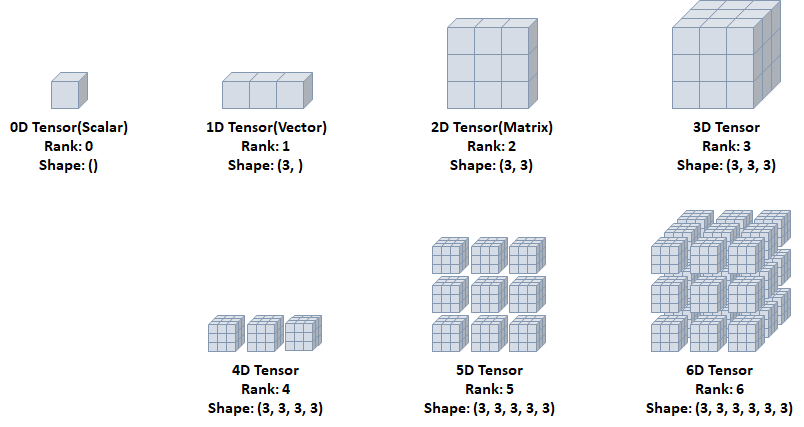

파이토치에서는 텐서 타입만 가능 -> 텐서
shape 알아야 함
* 3D : (z,x,y)

### 2. 텐서 조작 - 1) 넘파이로 텐서 만들기

In [3]:
import numpy as np

# 1) 1D Numpy 행렬
# list -> tensor
t = np.array([0., 1., 2., 3., 4., 5., 6.])
print('Shape of t: ', t.shape)

# 2) 2D Numpy 행렬

t = np.array([[1., 2., 3.], [4., 5., 6.], [7., 8., 9.], [10., 11., 12.]])
print('Shape of t: ', t.shape)

Shape of t:  (7,)
Shape of t:  (4, 3)


### 텐서 조작 -2) 파이토치로 텐서 만들기

In [4]:
import torch

#  1) 1D PyTorch 텐서
t = torch.FloatTensor([0., 1., 2., 3., 4., 5., 6.])
print(t)
print(t.dim())  # rank. 즉, 차원
print(t.shape)  # shape
print(t.size()) # size

 # 2) 2D PyTorch 텐서
t = torch.FloatTensor([[1., 2., 3.],
                       [4., 5., 6.],
                       [7., 8., 9.],
                       [10., 11., 12.]
                      ])
print(t)
print(t.dim())  # rank. 즉, 차원
print(t.shape) # shape
print(t.size()) # size

tensor([0., 1., 2., 3., 4., 5., 6.])
1
torch.Size([7])
torch.Size([7])
tensor([[ 1.,  2.,  3.],
        [ 4.,  5.,  6.],
        [ 7.,  8.,  9.],
        [10., 11., 12.]])
2
torch.Size([4, 3])
torch.Size([4, 3])


### 2. 텐서 조작 - 3) 브로드캐스팅(Broadcasting)

In [5]:
# 텐서 + 텐서
m1 = torch.FloatTensor([[3, 3]])
m2 = torch.FloatTensor([[2, 2]])
print(m1 + m2)

# 벡터 텐서 + scalar 텐서
m1 = torch.FloatTensor([[1, 2]])
m2 = torch.FloatTensor([3]) # [3] -> [3, 3]
print(m1 + m2)

m1 = torch.FloatTensor([[1, 2]]) # 2 x 1 벡터 텐서
m2 = torch.FloatTensor([[3], [4]]) # 1 x 2 벡터 텐서
print(m1 + m2) # 각각 더해져서 나온다.

tensor([[5., 5.]])
tensor([[4., 5.]])
tensor([[4., 5.],
        [5., 6.]])


In [ ]:
# 연습 문제
# 1. [[1,2]] + [3] = [[4,5]]
# 2. [[1,2],[4,5]] + [7] = [[8,9],[11,12]]
# 3. [[1,2],[4,5]] + [1,2] = [[2,4],[5,7]]
# 4. [[1,2,3],[4,5,6]] + [7] = [[8,9,10],[11,12,13]]
# 5. [[1,2],[3,4]] + [5] = [[6,7],[8,9]]
# 6. [[6]] + [[2,4],[5,6]] = [[8,10],[11,12]]
# 7. [[3,4]] + [[1,2],[3,4]] = [[4,6],[6,8]]
# 8. [[2,4]] + [5] = [[7],[9]]
# 9. [[1,2],[3,4]] + [6] = [[7,8],[9,10]]
# 10. [[5,7],[9,11]] + [2,3] = [[7,10],[11,14]]
# 11. [[1,1,1],[2,2,2]] + [3] = [[4,4,4],[5,5,5]]
# 12. [[3,5],[7,9]] + [[1,2],[3,4]] = [[4,7],[10,13]]
# 13. [[4]] + [[1,3],[5,7]] = [[5,7],[9,11]]
# 14. [[6,8]] + [4] = [[10,12]]
# 15. [[3,3],[3,3]] + [7] = [[10,10],[10,10]]
# 16. [[2,4,6]] + [[1,1,1],[2,2,2]] = [[3,5,7],[4,6,8]]
# 17. [[9,8],[7,6]] + [1] = [[10,9],[8,7]]
# 18. [[1]] + [[5,5],[5,5]] = [[6,6],[6,6]]
# 19. [[4,4]] + [[2,2],[2,2]] = [[6,6],[6,6]]
# 20. [[1,2,3],[4,5,6],[8,9,9]] + [3] = [[4,5,6],[7,8,9],[10,11,12]

### 2. 텐서 조작 - 4) 곱셈

### 행렬곱 (Matrix Multiplication) - 행렬 곱셈으로 수행

In [6]:
m1 = torch.FloatTensor([[1, 2], [3, 4]]) # 2 x 2 행렬 원소 곱셈 원리 (m x n) x (n x p)
m2 = torch.FloatTensor([[1], [2]]) # 2 x 1 (열벡터) ※ 1x2 (행벡터)
print(m1.matmul(m2)) # 2 x 1  matrix multiplication

tensor([[ 5.],
        [11.]])


### 곱셈 (Multiplication) - 원소끼리 곱해짐

In [7]:
m1 = torch.FloatTensor([[1, 2], [3, 4]]) # 2 x 2
m2 = torch.FloatTensor([[1], [2]]) # 2 x 1
print(m1 * m2) # 2 x 2
print(m1.mul(m2)) # 2 x 2 동일한 연산.

tensor([[1., 2.],
        [6., 8.]])
tensor([[1., 2.],
        [6., 8.]])


### 2. 텐서 조작 - 5) 평균

In [8]:
t = torch.FloatTensor([1, 2])
print(t.mean())

t = torch.FloatTensor([[1, 2], [3, 4]])
print(t.mean())

print(t.mean(dim=0)) # 세로방향
print(t.mean(dim=1)) # 가로방향

tensor(1.5000)
tensor(2.5000)
tensor([2., 3.])
tensor([1.5000, 3.5000])


### 2. 텐서 조작 - 6) 덧셈

In [9]:
t = torch.FloatTensor([[1, 2],
                       [3, 4]])
print(t)
print(t.sum()) # 단순히 원소 전체의 덧셈을 수행
print(t.sum(dim=0)) # 세로방향

print(t.sum(dim=1)) # 가로방향, 마지막 차원
print(t.sum(dim=-1)) # 마지막 차원    (2,2) => 0, 1 dim 방향 즉 마지막 차원은 dim=1 이란 뜻이다.

tensor([[1., 2.],
        [3., 4.]])
tensor(10.)
tensor([4., 6.])
tensor([3., 7.])
tensor([3., 7.])


### 3차원은 좀 dim 인덱스 순서가 다르다!

2D: 0 세로, 1 가로

3D: 0 z 방향, 1 세로, 2 가로

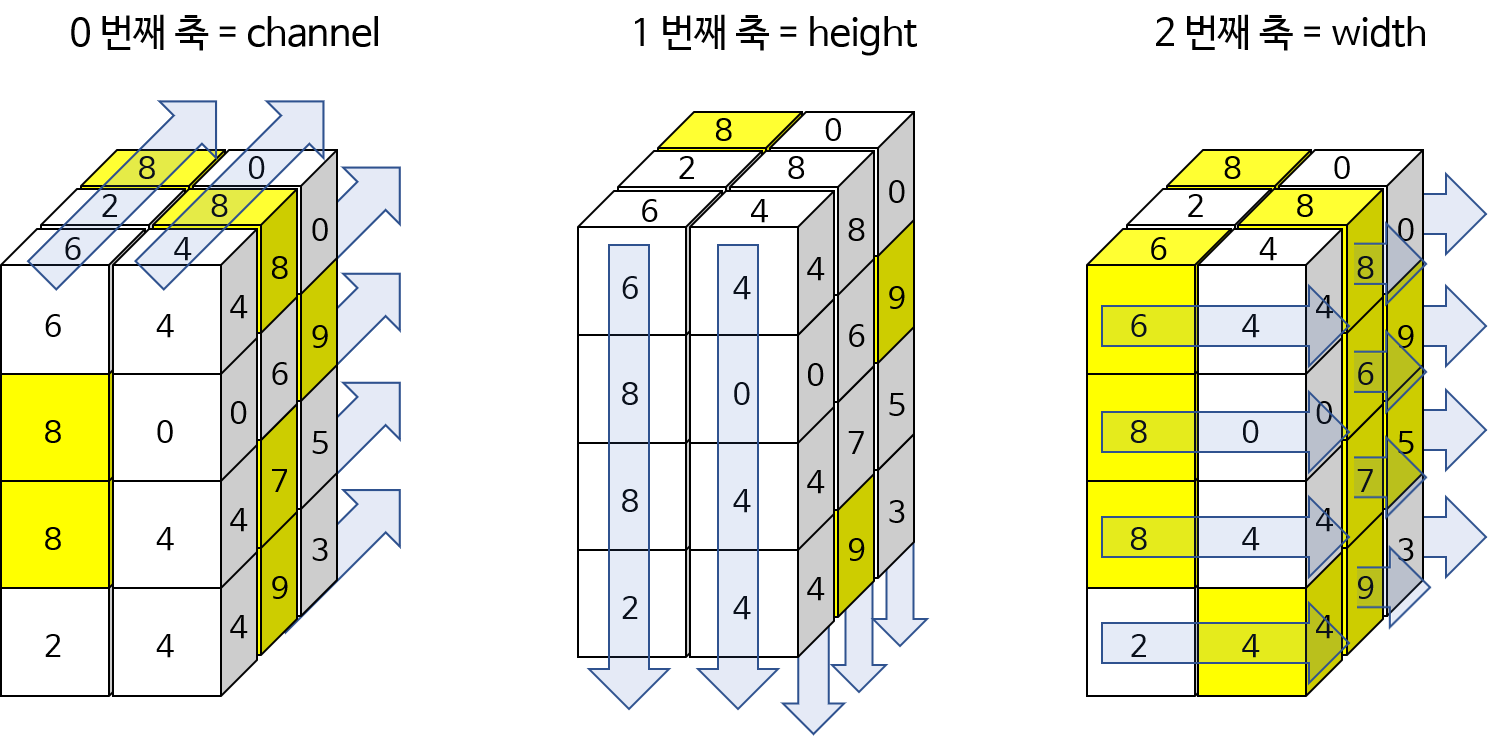

In [10]:
tensor = torch.tensor([
    [[6, 4, 0],
     [8, 4, 9],
     [8, 0, 5]],

    [[6, 4, 0],
     [8, 4, 9],
     [8, 0, 5]],

    [[2, 4, 4],
     [6, 4, 4],
     [4, 3, 9]]
])

print("========================================")
# z방향
sum_dim0 = torch.sum(tensor, dim=0)
mean_dim0 = torch.mean(tensor.float(), dim=0)

print("Sum along dim=0:\n", sum_dim0)
print("Mean along dim=0:\n", mean_dim0)

print("========================================")
# 아래방향
sum_dim1 = torch.sum(tensor, dim=1)
mean_dim1 = torch.mean(tensor.float(), dim=1)

print("Sum along dim=1:\n", sum_dim1)
print("Mean along dim=1:\n", mean_dim1)

print("========================================")
# 옆방향
sum_dim2 = torch.sum(tensor, dim=2)
mean_dim2 = torch.mean(tensor.float(), dim=2)

print("Sum along dim=2:\n", sum_dim2)
print("Mean along dim=2:\n", mean_dim2)

Sum along dim=0:
 tensor([[14, 12,  4],
        [22, 12, 22],
        [20,  3, 19]])
Mean along dim=0:
 tensor([[4.6667, 4.0000, 1.3333],
        [7.3333, 4.0000, 7.3333],
        [6.6667, 1.0000, 6.3333]])
Sum along dim=1:
 tensor([[22,  8, 14],
        [22,  8, 14],
        [12, 11, 17]])
Mean along dim=1:
 tensor([[7.3333, 2.6667, 4.6667],
        [7.3333, 2.6667, 4.6667],
        [4.0000, 3.6667, 5.6667]])
Sum along dim=2:
 tensor([[10, 21, 13],
        [10, 21, 13],
        [10, 14, 16]])
Mean along dim=2:
 tensor([[3.3333, 7.0000, 4.3333],
        [3.3333, 7.0000, 4.3333],
        [3.3333, 4.6667, 5.3333]])


In [ ]:
import numpy as np
import torch
# 작성 예시:
# 1. m1 = torch.tensor([[1, 2], [3, 4]])
#    m2 = torch.tensor([[5, 6], [7, 8]])
#    result = m1.matmul(m2)
#    답: tensor([[19, 22], [43, 50]])

# 2. m1 = torch.tensor([[2, 0], [1, 3]])
#    m2 = torch.tensor([[3, 4], [2, 1]])
#    result = m1.matmul(m2)
#    답:[[6, 8],[9, 7]]

# 3. m1 = torch.tensor([[1, 2, 3], [4, 5, 6]])
#    m2 = torch.tensor([[7, 8], [9, 10], [11, 12]])
#    result = m1.matmul(m2)
#    답: [ 58,  64],[139, 154]]

# 4. t = torch.tensor([[1, 2], [3, 4]])
#    result = t.mean()
#    답:tensor(2.5000)
# 5. t = torch.tensor([[3, 6], [9, 12]])
#    result = t.mean(dim=1) # dim =1 은 가
#    답:tensor([ 4.5000, 10.5000])

# 6. t = torch.tensor([[1, 1, 1], [2, 2, 2]])
#    result = t.mean(dim=0)
#    답: tensor([1.5000, 1.5000, 1.5000])

# 7. t = torch.tensor([[1, 2], [3, 4]])
#    result = t.sum(dim=0)
#    답: tensor([4, 6])

# 8. t = torch.tensor([[2, 4], [6, 8]])
#    result = t.sum(dim=1)
#    답: tensor([ 6, 14])

# 9. t = torch.tensor([[1, 3], [5, 7]])
#    result = t.sum()
#    답: tensor(16)

# 10. m1 = torch.tensor([[2, 4, 6]])
#     m2 = torch.tensor([[1], [3], [5]])
#     result = m1.matmul(m2)
#     답: tensor([[44]])

# 11. m1 = torch.tensor([[5, 6], [7, 8]])
#     m2 = torch.tensor([[9, 10], [11, 12]])
#     result = m1.matmul(m2)
#     답: tensor([[111, 122], [143, 158]])

# 12. t = torch.FloatTensor([[2, 4], [6, 8]]) Float으로 바꿔줘야함 int형으로 지정되어있기 때문에
#     result = t.mean(dim=1) # 가
#     답: tensor([3.0000, 7.0000])

# 13. t = torch.tensor([[3, 3], [6, 6]])
#     result = t.mean(dim=0)
#     답: tensor([4.5000, 4.5000])

# 14. t = torch.tensor([[1, 1], [2, 2]])
#     result = t.sum(dim=1)
#     답: tensor([2, 4])

# 15. t = torch.tensor([[2, 2], [3, 3]])
#     result = t.sum()
#     답:tensor(10)

# 16. m1 = torch.tensor([[1, 0, 2], [-1, 3, 1]])
#     m2 = torch.tensor([[2, 3], [4, 5], [6, 7]])
#     result = m1.matmul(m2)
#     답: tensor([[14, 17], [16, 20]])

# 17. t = torch.tensor([[5, 10], [15, 20]])
#     result = t.mean(dim=1)
#     답:  tensor([ 7.5000, 17.5000])

# 18. t = torch.tensor([[2, 5, 8], [3, 6, 9]])
#     result = t.mean(dim=0)
#     답: tensor([2.5000, 5.5000, 8.5000])

# 19. t = torch.tensor([[1, 2], [3, 4]])
#     result = t.sum(dim=1)
#     답: tensor([3, 7])

# 20. t = torch.tensor([[1, 3, 5], [7, 9, 11]])
#     result = t.sum(dim=0)
#     답: tensor([ 8, 12, 16])


### 2. 텐서 조작 - 7) Max와 ArgMax => 중요!! classification에 사용

argmax란 텐서에서 가장 큰 값의 인덱스를 반환하는 것이다.

In [11]:
t = torch.FloatTensor([[1, 2], [3, 4]])
print(t)

print(t.max(dim=0))
print(t.max(dim=0)[0])
print(t.max(dim=0)[1]) #argmax와 같음

tensor([[1., 2.],
        [3., 4.]])
torch.return_types.max(
values=tensor([3., 4.]),
indices=tensor([1, 1]))
tensor([3., 4.])
tensor([1, 1])


In [12]:
print("argmax:", t.argmax(0) ) # 0 방향으로 최대값의 위치


# argmax란 텐서에서 가장 큰 값의 인덱스를 반환하는 것이다.

argmax: tensor([1, 1])


■ 중간문제: max, argmax 훈련

In [ ]:
# 1. t = torch.tensor([[1, 3, 5], [7, 9, 11]])
#    result = torch.max(t)
#    답: tensor(11)

# 2. t = torch.tensor([[4, 7, 2], [5, 8, 1]])
#    result = torch.max(t, dim=0)
#    답:tensor([5, 8, 2])

# 3. t = torch.tensor([[1, 3, 5], [7, 9, 11]])
#    result = torch.argmax(t, dim=1)
#    답: tensor([2, 2])

# 4. t = torch.tensor([[10, 20, 30], [40, 50, 60], [15, 25, 35]])
#    result = torch.max(t, dim=1)
#    답:  tensor([30, 60, 35])

# 5. t = torch.tensor([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
#    result = torch.argmax(t)
#    답: tensor([0, 1])

# 6. t = torch.tensor([[0, 1, 2], [2, 1, 0], [3, 4, 5]])
#    result = torch.argmax(t, dim=0)
#    답:tensor(8)


# 7. t = torch.tensor([[8, 3, 7], [2, 9, 4]])
#    result = torch.argmax(t, dim=1)
#    답: tensor([0, 1])

# 8. t = torch.tensor([[9, 6, 3], [2, 5, 8]])
#     result = torch.max(t, dim=0)
#     답: tensor([9, 6, 8])


# 9. t = torch.tensor([[[1, 4, 7], [2, 5, 8]], [[3, 6, 9], [4, 7, 10]]])
#     result = torch.argmax(t, dim=2)
#     답: tensor([[2, 2], [2, 2]])


# 10. t = torch.tensor([[1, 2], [3, 4], [5, 6]])
#     result = torch.argmax(t, dim=1)
#     답: tensor([1, 1, 1])

# 11. t = torch.tensor([[2, 7, 1], [4, 3, 6], [5, 9, 0]])
#     result = torch.max(t, dim=1)
#     답: tensor([7, 6, 9])


# 12. t = torch.tensor([[4, 1, 6], [7, 2, 8], [3, 5, 9]])
#     result = torch.argmax(t, dim=0)
#     답: tensor([1, 2, 2])

# 13. t = torch.tensor([[10, 20, 30], [15, 25, 35], [5, 15, 25]])
#     result = torch.max(t, dim=1)
#     답: tensor([30, 35, 25])


### 2. 텐서 조작 - 8) 뷰(view)

In [13]:
import numpy as np
import torch

t = np.array([[[0, 1, 2],
               [3, 4, 5]],

              [[6, 7, 8],
               [9, 10, 11]]])
ft = torch.FloatTensor(t)

In [14]:
# 차원부터 확인하자
print(ft.shape)

torch.Size([2, 2, 3])


In [15]:
# 3차원 텐서에서 2차원 텐서로 변경
print(ft.view([-1, 3])) # ft라는 텐서를 (?, 3)의 크기로 변경 # 열만 3개로 맞추고 행은 알아서 자동맞춤 해주는 것
print(ft.view([-1, 3]).shape)

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 6.,  7.,  8.],
        [ 9., 10., 11.]])
torch.Size([4, 3])


In [16]:
# 3차원 텐서의 크기 변경
print(ft.view([-1, 1, 3]))     # ? x 1 x 3 에 맞춰라, ?는 맞게 크기를 알아서 지정해라.
print(ft.view([-1, 1, 3]).shape)

tensor([[[ 0.,  1.,  2.]],

        [[ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.]],

        [[ 9., 10., 11.]]])
torch.Size([4, 1, 3])


### 2. 텐서 조작 - 9) 스퀴지(Squeeze) - 1인 차원을 제거한다.

In [17]:
ft = torch.FloatTensor([[0], [1], [2]])
print(ft)
print(ft.shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


In [18]:
print(ft.squeeze())      # 2차원에서 1차원으로 줄여라
print(ft.squeeze().shape)

tensor([0., 1., 2.])
torch.Size([3])


### 헷갈릴 수 있으니, 아래도 해보자! - 차원을 줄이는건 앞이던 뒤던 줄인다.

In [19]:
ft = torch.FloatTensor([[0, 1, 2]])
print(ft)
print(ft.shape)

print(ft.squeeze())      # 2차원에서 1차원으로 줄여라
print(ft.squeeze().shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])
tensor([0., 1., 2.])
torch.Size([3])


### 2. 텐서 조작 - 10) 언스퀴지(Unsqueeze) - ★특정 위치★에 1인 차원을 추가한다.

In [20]:
ft = torch.Tensor([0, 1, 2]) # 이게 중심으로 진행되니 shape을 꼭 기억하자.
print(ft.shape)

torch.Size([3])


### 차원추가① - Unsqueeze로 차원 추가해보기!

In [21]:
print(ft.unsqueeze(0)) # 인덱스가 0부터 시작하므로 0은 첫번째 차원을 의미한다.
print(ft.unsqueeze(0).shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


### 차원추가② - view로도 Unsqueeze가 가능하다!

In [22]:
print(ft.view(1, -1))      # 1 x ? 차원으로 만든다. ?의 의미가 뭐였죠~?
print(ft.view(1, -1).shape)

tensor([[0., 1., 2.]])
torch.Size([1, 3])


### 차원추가③ - 차원을 특정 위치에 추가해보자!

In [23]:
print(ft.unsqueeze(1))
print(ft.unsqueeze(1).shape)

tensor([[0.],
        [1.],
        [2.]])
torch.Size([3, 1])


### 2. 텐서 조작 - 11) 텐서타입은 뭐가 있나요?

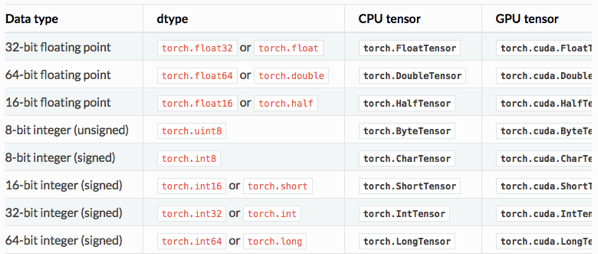

### 리스트를 텐서로 바꿀 때 타입 지정

In [24]:
lt = torch.LongTensor([1, 2, 3, 4])
print(lt)

tensor([1, 2, 3, 4])


In [25]:
bt = torch.ByteTensor([True, False, False, True])
print(bt)

tensor([1, 0, 0, 1], dtype=torch.uint8)


### 텐서에서 타입지정

In [26]:
print(bt.long()) # 뒤에 붙이기만해도 타입이 바뀐다!
print(bt.float()) # 뒤에 붙이기만해도 타입이 바뀐다!

tensor([1, 0, 0, 1])
tensor([1., 0., 0., 1.])


### 2. 텐서 조작 - 12) 연결하기 : cat => 차원을 먼저 늘린 후에, 쌓아야 함

In [27]:
x = torch.FloatTensor([[1, 2], [3, 4]])
y = torch.FloatTensor([[5, 6], [7, 8]])

print(torch.cat([x, y], dim=0))

tensor([[1., 2.],
        [3., 4.],
        [5., 6.],
        [7., 8.]])


In [28]:
print(torch.cat([x, y], dim=1))

tensor([[1., 2., 5., 6.],
        [3., 4., 7., 8.]])


### 2. 텐서 조작 - 13) 쌓기 또는 스택킹(Stacking) => 알아서 차원이 늘어남

In [29]:
x = torch.FloatTensor([1, 4])
y = torch.FloatTensor([2, 5])
z = torch.FloatTensor([3, 6])

In [30]:
# 세로방향으로 쌓기
print(torch.stack([x, y, z]))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


In [31]:
# 가로방향으로 쌓기
print(torch.stack([x, y, z], dim=1))

tensor([[1., 2., 3.],
        [4., 5., 6.]])


In [32]:
# cat은 좀 다르죠?
print(torch.cat([x, y, z], dim=0))

tensor([1., 4., 2., 5., 3., 6.])


In [33]:
# 그래서 차원을 합칠때의 차원으로 먼저 만들어줘야 한다!
print(torch.cat([x.unsqueeze(0), y.unsqueeze(0), z.unsqueeze(0)], dim=0))

tensor([[1., 4.],
        [2., 5.],
        [3., 6.]])


### 2. 텐서 조작 - 14) ones_like와 zeros_like - 0으로 채워진 텐서와 1로 채워진 텐서


In [34]:
x = torch.FloatTensor([[0, 1, 2], [2, 1, 0]])
print(x)

tensor([[0., 1., 2.],
        [2., 1., 0.]])


In [35]:
print(torch.ones_like(x)) # x와 동일한 차원의 one 텐서를 만든다.

tensor([[1., 1., 1.],
        [1., 1., 1.]])


In [36]:
print(torch.zeros_like(x)) # x와 동일한 차원의 zero 텐서를 만든다.

tensor([[0., 0., 0.],
        [0., 0., 0.]])


### 2. 텐서 조작 - 15) 덮어쓰기 연산 : 중요!!!


In [37]:
x = torch.FloatTensor([[1, 2], [3, 4]])
print(x.mul(2.)) # 곱하기 2를 수행한 결과를 출력

tensor([[2., 4.],
        [6., 8.]])


In [38]:
print(x) # 기존의 값 출력

tensor([[1., 2.],
        [3., 4.]])


### _를 붙이면 계산과 동시에 기존의 값을 덮어쓰기 합니다.

In [39]:
print(x.mul_(2.))  # 곱하기 2를 수행한 결과를 변수 x에 값을 저장하면서 결과를 출력

tensor([[2., 4.],
        [6., 8.]])


In [40]:
print(x) # 기존의 값 출력 (덮어쓰기 됨)

tensor([[2., 4.],
        [6., 8.]])


# 텐서 끝============================================================================